# Plotting functions for the various BayesOpt Implementations

In [1]:
# imports
import torch
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcolors
import matplotlib.cm as cm

from botorch.utils.multi_objective.pareto import is_non_dominated
from cobra.io import load_model, load_json_model

In [2]:
# Helper functions to be used across notebooks
%run HelperFunctions_MOBO_II.ipynb

In [ ]:
model_iJO1366_antiEpEX_scFv = load_json_model("..//Models//iJO1366_producing_antiEpEX-scFv.json")

In [10]:
medium_iJO1366_enriched = {
    'EX_pi_e': 34.90, # in M9
    'EX_mn2_e': 0.001, # - required?; drops at 0.0001
    'EX_fe2_e': 0.1, # - required?; drops at 0.01
    'EX_glc__D_e': 10.0, # in M9
    'EX_zn2_e': 0.001, # - required?; drops at 0.0001
    'EX_mg2_e': 1.0, # in M9 
    'EX_ca2_e': 0.05, # in M9
    'EX_ni2_e': 0.001, # - required?; drops at 0.0001
    'EX_cu2_e': 0.001, # - required?; drops at 0.0001
    'EX_cobalt2_e': 0.0001, # - required; drops at 0.00001 
    'EX_mobd_e': 0.0005, # - required?; drops at 0.0001 - higher than for iML1515
    'EX_so4_e': 1.0, # in M9
    'EX_nh4_e': 9.3475, # in M9 # lower than with 10
    'EX_k_e': 11.02, # in M9
    'EX_na1_e': 52.038, # in M9
    'EX_cl_e': 13.6755, # in M9
    'EX_o2_e': 20.0, # in M9 II - drops at 10
    'EX_arg__L_e': 4.75, # L-Arginine
    'EX_asn__L_e': 3.05, # L-Asparagine
    'EX_gln__L_e' : 4.95 # L-Glutamine
}
bounds_iJO1366_enriched = {
    'EX_pi_e': (0.0, 50),
    'EX_mn2_e': (0.001, 0.001), # fixed "trace" 
    'EX_fe2_e': (0.1, 0.1), # fixed "trace"
    'EX_glc__D_e': (1.0, 10),
    'EX_zn2_e': (0.001, 0.001), # fixed "trace"
    'EX_mg2_e': (0.0, 10),
    'EX_ca2_e': (0.0, 10),
    'EX_ni2_e': (0.001, 0.001), # fixed "trace"
    'EX_cu2_e': (0.001, 0.001), # fixed "trace"
    'EX_cobalt2_e': (0.0001, 0.0001), # fixed "trace"
    'EX_mobd_e': (0.0005, 0.0005), # fixed "trace"
    'EX_so4_e': (0.0, 10),
    'EX_nh4_e': (0.0, 10), # close to the default of 9.3475
    'EX_k_e': (0.0, 20),
    'EX_na1_e': (0.0, 100.0), # if fixed - can be set to 0
    'EX_cl_e': (0.0, 20),
    'EX_o2_e': (0, 20), # if fixed - can't be set to 10 or lower
    'EX_arg__L_e': (0.0, 10.0), # L-Arginine
    'EX_asn__L_e': (0.0, 10.0), # L-Asparagine
    'EX_gln__L_e' : (0.0, 10.0) # L-Glutamine
}
# costs are in £/mol
costs_iJO1366_enriched = {
    'EX_pi_e': 23.4234, # Phosphate - approximate (several sources)
    'EX_mn2_e': 0.0, #33.25, # Manganese - MnCl2·4H20
    'EX_fe2_e': 0.0, #37.5, # IronII - as iron sulfate FeSO4·7H2O
    'EX_glc__D_e': 7.7647236, # Glucose
    'EX_zn2_e': 0.0, #28.3, # Zinc - as Zn(CH3CHOOH)·H2O
    'EX_mg2_e': 19.1022, # Magnesium - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_ca2_e': 18.08223, # Calcium - as CaCl2·2H2O
    'EX_ni2_e': 0.0, #53.24, # Nickel - as NiCl2·6H2O
    'EX_cu2_e': 0.0, #31.37, # Copper - CuCl2·2H2O
    'EX_cobalt2_e': 0.0, #114.39, # Cobalt - as CoCl2·6H2O
    'EX_mobd_e': 0.0, #184.12, # Molybdenum - molybdate NaMoO4·2H2O
    'EX_so4_e': 19.1022, # Sulfate - as MgSO4·7H2O - approximate bc. half of 38.2044
    'EX_nh4_e': 10.099587, # Ammonia - as NH4Cl - approximate (several sources and "side-effect"
    'EX_k_e': 20.82177, # Potassium - as KCl - approximate (several sources and "side-effect"
    'EX_na1_e': 0.0, # Sodium - as NaCl, Na2HPO4
    'EX_cl_e': 3.03888, # Chlorid - as NaCl, NH4Cl, CaCl2 - approximate price from NaCl
    'EX_o2_e': 0.0, # oxygen - no costs
    'EX_arg__L_e': 61.1442, # L-Arginine
    'EX_asn__L_e': 93.01248, # L-Asparagine
    'EX_gln__L_e' : 80.23086 # L-Glutamine
}

model_iJO1366_antiEpEX_scFv.medium = medium_iJO1366_enriched

protein_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("Recombinant_protein")
biomass_rxn = model_iJO1366_antiEpEX_scFv.reactions.get_by_id("BIOMASS_Ec_iJO1366_core_53p95M")
# limit growth rate to 0.85
biomass_rxn.bounds = (0.0, 0.85)

# create combined objective
factor_bio = 0.99 # when set to 1, only biomass production is optimised, when smaller, protein production included
factor_prot = 1 - factor_bio
combined_objective = model_iJO1366_antiEpEX_scFv.problem.Objective(
    factor_bio * model_iJO1366_antiEpEX_scFv.reactions.BIOMASS_Ec_iJO1366_core_53p95M.flux_expression + 
    factor_prot * model_iJO1366_antiEpEX_scFv.reactions.Recombinant_protein.flux_expression,
    direction = 'max')

model_iJO1366_antiEpEX_scFv.objective = combined_objective

In [4]:
# colour gradient is batch to batch
def plot_pareto_batch_colour(
    results, 
    xax = "growth rate tensors", 
    yax = "cost tensors", 
    figname = "figure.png",
    MetModel = None,
    initial_medium = None,
    initial_costs = None,
    model_objective = None,
    ):
    """
    Plots the performance category indicated by "xax" (default: growth rate) on x-axis against 
    the performance category indicated by "yax" (default: medium cost) on the y-axis
    for each candidate medium.
    Each dot is colour-coded according to the batch it resulted from.
    Plots Pareto front deduced from data.
    When the metabolic model (MetModel), the baseline medium (initial_medium) and 
    the corresponding baseline costs (initial_costs) are given, the performance of the baseline
    medium is plotted onto the graph to allow for visual performance comparison
    Saves the figure (as png file)

    PARAMETERS
    * results - dictionary - output of media_BayesOpt
    * xax - string - variable to plot on x-axis
    * yax - string - variable to plot on y-axis
    * figname - string - name under which to save the figure
    * MetModel - cobra model - Metabolic model for simulation & used for optimisation
    * initial_medium - dictionary - Medium for initial simulation
    * initial_costs - dictionary - Costs associated with the initial medium
    * model_objective
    
    RETURNS
    - 
    """
    valid_values = {"growth rate tensors", "cost tensors", "production tensors"}
    if xax not in valid_values or yax not in valid_values:
        raise ValueError(f"xax and yax must be one of {valid_values}, but got xax='{xax}' and yax='{yax}'")


    # extract data from results (growth rate and medium costs)
    x_np = results[xax].cpu().numpy() # are positive
    y_np = results[yax].cpu().numpy() # are positive
    
    # Stack the two objectives (growth rate and medium cost) into a single 2Darray
    # rows: candidates
    # columns: grwoth rate, medium costs
    y = np.column_stack([x_np, y_np])
    
    # Create the plot with given size
    fig, axes = plt.subplots(1, 1, figsize = (9, 7))
    

    # Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
    n_batch = results["n_iter"]
    n_start = results["n_start"]
    n_candidates = results["n_candidates"]
    
     # Generate distinct colours
    colours = plt.cm.viridis(np.linspace(0, 1, n_batch + 1))
    # Create a custom colourmap for the colour bar
    cmap = mcolors.ListedColormap(colours)

    # Create an array to store colours for each data point
    point_colours = np.zeros(len(results[xax]), dtype = object)

    # Assign first n_start points the same colour
    point_colours[:n_start] = [colours[0]] * n_start
    # Assign different colours to each batch
    for i in range(n_batch):
        start_idx = n_start + i * n_candidates
        end_idx = start_idx + n_candidates
        point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch
    
    # Set boundaries between each batch, from -0.5 to n_batch + 0.5
    boundaries = np.arange(n_batch + 2) - 0.5
    norm = mcolors.BoundaryNorm(boundaries, cmap.N)

    # Scatter plot with custom colours, applying transparence (alpha = 0.8)
    sc = axes.scatter(y[:, 0], y[:, 1], c = point_colours, alpha = 0.8)

    # Set y-axis to log scale if it contains costs
    if yax == "cost tensors":
        axes.set_yscale("log")
    
    """
    Pareto Front
    is_non_dominated assumes maximisation
    """
    # negate costs because maximisation is assumed
    factor = 1
    if yax == "cost tensors":
        y[:, 1] = -y[:, 1]
        factor = -1

    # Sort points by the first objective (growth rate) 
    # -> allows to plot front in order of increasing xax (growth rate)
    y_sorted = y[np.argsort(y[:, 0])]
    
    # Compute non-dominated (Pareto front) points; i.e. optimal trade.offs
    is_pareto = is_non_dominated(torch.tensor(y_sorted).to(**tkwargs))

    # Plot the Pareto front
    axes.plot(
        [y[0] for pareto, y in zip(is_pareto, y_sorted) if pareto], # negate again so it's back o orig. value
        [factor * y[1] for pareto, y in zip(is_pareto, y_sorted) if pareto], # negate if production
        label="Pareto Front",
        color="r",
        linewidth=2,
    )

    """
    M9 on Pareto front
    """
    # if model, initial medium and costs are given
    if MetModel and initial_medium and initial_costs:
        # Set the initial medium as medium in the model
        MetModel.medium = initial_medium
        # Set model objective to desired one
        if model_objective is None:
            MetModel.objective = results["model objective"]
        else:
            MetModel.objective = model_objective
        # Run optimisation
        solution = MetModel.optimize()
        initial_growth_rate = solution.fluxes[results["biomass objective"]]
        initial_cost = calc_cost_tot(initial_costs, initial_medium).cpu().numpy()
        
        initial_production = -1        
        if results["production objective"] is not None:
            initial_production = solution.fluxes[results["production objective"]]

        # map initial data to corresponding axes depending on call
        mapping = {
            "growth rate tensors": initial_growth_rate,
            "cost tensors": initial_cost,
            "production tensors": initial_production
        }
        ini_x = mapping.get(xax)
        ini_y = mapping.get(yax)
        
        # Plot initial point as a red cross in 3D
        axes.scatter(
            ini_x, # x-axis
            ini_y, # y-axis
            color = "red", marker = "x", label = "Original Medium", s = 100, zorder = 5
        )

        
    """
    Add labels and titles
    """

    mapping = {
        "growth rate tensors": "Growth Rate [1/h]",
        "cost tensors": "Medium Cost [$10^{-3}$ £/gDW·h]",
        "production tensors": "Production Rate [mmol/gDW·h]"
    }
    axes.set_xlabel(mapping.get(xax))
    axes.set_ylabel(mapping.get(yax))
    axes.set_title(f"{mapping.get(xax)} vs. {mapping.get(yax)} With Pareto Front")

    # Add the color bar
    tick_positions = np.arange(0, n_batch + 1, 5)
    sm = cm.ScalarMappable(cmap = cmap, norm = norm)
    cbar = fig.colorbar(sm, ax = axes, ticks = tick_positions, pad=0.12)
    cbar.ax.set_title("Iteration")
    cbar.ax.tick_params(which='minor', size=0) # turn off minor ticks at colour boundaries
    
    # Display the legend
    axes.legend()
    
    # Show the plot
    plt.show()

    # Save the figure
    figname = figname

    fig.set_size_inches(9, 7)  # Consistent physical size in inches
    fig.savefig(figname, dpi=300, bbox_inches=None)

In [13]:
def plot_3D(
    results, 
    xax = "growth rate tensors", 
    yax = "cost tensors", 
    zax = "production tensors",
    figname = "figure.png",
    n_candidates = 1,
    MetModel = None,
    initial_medium = None,
    initial_costs = None,
    model_objective = None,
    ):
    """
    Plots the performance category indicated by "xax" (default: growth rate) on the x-axis against 
    the performance category indicated by "yax" (default: medium cost) on the y-axis against
    the performance category indicated by "zax" (default: production rate) on the z-axis
    for each candidate medium.
    Each dot is colour-coded according to the iteration it resulted from.
    If the metabolic model (MetModel), the baseline medium (initial_medium) and 
    the corresponding baseline costs (initial_costs) are given, the performance of the baseline
    medium is plotted onto the graph to allow for visual performance comparison
    Saves the figure (as png file)

    PARAMETERS
    * results - dictionary - output of media_BayesOpt
    * xax - string - variable to plot on x-axis
    * yax - string - variable to plot on y-axis
    * zax - string - variable to plot on z-axis
    * figname - string - name under which to save the figure
    * n_candidates - int - batch-size
    * MetModel - cobra model - Metabolic model for simulation & used for optimisation
    * initial_medium - dictionary - Medium for initial simulation
    * initial_costs - dictionary - Costs associated with the initial medium
    * model_objective
    
    RETURNS
    - 
    """

    # assert that x-axis is a legal choice
    opt_xax = ["growth rate tensors", "cost tensors", "production tensors"]
    if xax not in opt_xax:
        raise ValueError(f"Invalid xax. Expected one of: {opt_xax}")
    # assert that y-axis is a legal choice
    opt_yax = ["growth rate tensors", "cost tensors", "production tensors"]
    if yax not in opt_yax:
        raise ValueError(f"Invalid yax. Expected one of: {opt_yax}")
    # assert that z-axis is a legal choice
    opt_zax = ["growth rate tensors", "cost tensors", "production tensors"]
    if zax not in opt_zax:
        raise ValueError(f"Invalid zax. Expected one of: {opt_zax}")
    
    # extract data from results (growth rate and medium costs)
    x_np = results[xax].cpu().numpy() # are positive
    y_np = results[yax].cpu().numpy() # are positive
    z_np = results[zax].cpu().numpy() # are positive
    
    
    # Stack the two objectives (growth rate and medium cost) into a single 2Darray
    # rows: candidates
    # columns: grwoth rate, medium costs
    y = np.column_stack([x_np, y_np, z_np])
    
    # Create figure and add 3D subplot
    fig = plt.figure(figsize = (9, 7))
    ax = fig.add_subplot(projection='3d')
    
    # Define colour mapping - 1 for random initial points, 1 each per batch (n_iter)
    n_batch = 100
    n_start = 50
    n_candidates = 10

    # Generate distinct colours
    colours = plt.cm.viridis(np.linspace(0, 1, n_batch + 1))
    # Create a custom colourmap for the colour bar
    cmap = mcolors.ListedColormap(colours)

    # Create an array to store colours for each data point
    point_colours = np.zeros(len(results[xax]), dtype = object)

    # Assign first `n_start` points the same color
    point_colours[:n_start] = [colours[0]] * n_start
    # Assign different colours to each batch
    for i in range(n_batch):
        start_idx = n_start + i * n_candidates
        end_idx = start_idx + n_candidates
        point_colours[start_idx:end_idx] = [colours[i + 1]] * (end_idx - start_idx) # Assign a new color per batch

    # Set boundaries between each batch, from -0.5 to n_batch + 0.5
    boundaries = np.arange(n_batch + 2) - 0.5
    norm = mcolors.BoundaryNorm(boundaries, cmap.N)

    # Scatter plot with custom colours, applying transparence (alpha = 0.8)    
    ax.scatter(y[:, 0], y[:, 1], y[:, 2], c = point_colours, alpha = 0.8)
    
    """    
    # Set x-axis to log scale if it contains costs
    if yax == "cost tensors":
        ax.set_yscale("log")
    """
    
    """
    original medium in comparison (red cross)
    """
    
    # if model, initial medium and costs are given
    if MetModel and initial_medium and initial_costs:
        # Set the initial medium as medium in the model
        MetModel.medium = initial_medium
        # Set model objective to desired one
        if model_objective is None:
            MetModel.objective = results["model objective"]
        else:
            MetModel.objective = model_objective

        solution = MetModel.optimize()
        initial_growth_rate = solution.fluxes[results["biomass objective"]]

        initial_production = solution.fluxes[results["production objective"]]
        initial_cost = calc_cost_tot(initial_costs, initial_medium).cpu().numpy()
        
        # map initial data to corresponding axes depending on call
        mapping = {
            "growth rate tensors": initial_growth_rate,
            "cost tensors": initial_cost,
            "production tensors": initial_production
        }
        ini_x = mapping.get(xax)
        ini_y = mapping.get(yax)
        ini_z = mapping.get(zax)
        
        # Plot initial point as a red cross in 3D
        ax.scatter(
            ini_x, # x-axis
            ini_y, # y-axis
            ini_z, # z-axis
            color = "red", marker = "x", label = "Original Medium", s = 100, zorder = 5
        )
    
    """
    Add labels and titles
    """
    mapping = {
        "growth rate tensors": "Growth Rate [1/h]",
        "cost tensors": "Medium Cost [$10^{-3}$ £/gDW·h]",
        "production tensors": "Production Rate [mmol/gDW·h]"
    }
    ax.set_xlabel(mapping.get(xax))
    ax.set_ylabel(mapping.get(yax))
    ax.set_zlabel(mapping.get(zax))
    ax.set_title("Growth Rate vs Production Rate vs Costs")

    # Add the color bar
    tick_positions = np.arange(0, n_batch + 1, 5)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = fig.colorbar(sm, ax=ax, ticks = tick_positions, pad=0.12)
    cbar.ax.set_title("Iteration")
    cbar.ax.tick_params(which='minor', size=0) # turn off minor ticks at colour boundaries
    
    # Display the legend
    ax.legend()
    
    # Show the plot
    plt.show()

    # Save the figure
    figname = figname
    fig.set_size_inches(9, 7)  # Consistent physical size in inches
    fig.savefig(figname, dpi=300, bbox_inches=None)

In [6]:
def plot_production_per_cost_coloured_by_growth(
    results,
    figname = "figure.png",
    growth_threshold = 0.5,
    production_threshold = 0.01,
    MetModel = None,
    initial_medium = None,
    initial_costs = None,
    model_objective = None
    ):
    """
    Subsets the results to the data points where both growth and production are above a given threshold.
    Plots production per cost coloured by growth, with an additional point for the initial medium.
    
    PARAMETERS
    * results - dictionary - output of media_BayesOpt
    * figname - string - name under which to save the figure
    * growth_threshold - double - Minimum growth rate threshold
    * production_threshold - double - Minimum production threshold
    * MetModel - cobra model - Metabolic model for simulation & used for optimisation
    * initial_medium - dictionary - Medium for initial simulation
    * initial_costs - dictionary - Costs associated with the initial medium

    RETURNS
    -
    """
    # Boolean masks for the conditions
    growth_mask = results["growth rate tensors"] >= growth_threshold
    production_mask = results["production tensors"] >= production_threshold

    # Combined mask for both conditions
    combined_mask = growth_mask & production_mask

    # Find indices where both conditions are satisfied
    indices = torch.nonzero(combined_mask, as_tuple=False)

    # Subset data based on indices
    growth_np = results["growth rate tensors"][indices[:, 0]].cpu().numpy()
    production_np = results["production tensors"][indices[:, 0]].cpu().numpy()
    cost_np = results["cost tensors"][indices[:, 0]].cpu().numpy()

    #cmap = plt.get_cmap("YlOrRd")
    cmap = plt.get_cmap("cividis")
    
    # Plotting
    plt.figure(figsize=(9, 7))
    scatter = plt.scatter(cost_np, production_np, c = growth_np, cmap = cmap, edgecolor = 'k', alpha = 0.9)
    plt.colorbar(scatter, label="Growth Rate [1/h]")
    plt.xlabel("Cost [$10^{-3}$ £/gDW·h]")
    plt.ylabel("Production [mmol/gDW·h]")
    plt.title("Production Per Cost Coloured by Growth")
    plt.grid(True)

    # If MetModel, initial_medium, and initial_costs are provided
    if MetModel and initial_medium and initial_costs:
        # Set the medium for M9 in the model
        MetModel.medium = initial_medium
        
        # Set model objective to desired one
        if model_objective is None:
            MetModel.objective = results["model objective"]
        else:
            MetModel.objective = model_objective

        # Run optimization
        solution = MetModel.optimize()
        initial_growth_rate = solution.fluxes[results["biomass objective"]]
        initial_production_rate = solution.fluxes[results["production objective"]]
        costs = calc_cost_tot(initial_costs, initial_medium).cpu().numpy()
    
        # Normalize initial growth rate for color mapping
        #initial_color = cmap(norm(initial_growth_rate))
        initial_color = cmap(initial_growth_rate)
        if growth_np.min() == growth_np.max():
            initial_color = cmap(0.5)  # Assign a single middle color for all points
    
        # Plot initial point
        plt.scatter(
            costs, initial_production_rate, 
            color = initial_color, marker = "D", label = "Original Medium", 
            s = 75, edgecolor = "k", zorder = 3, alpha = 0.9
        )
    
    plt.legend()
    plt.savefig(figname, dpi = 300)
    plt.show()
    plt.close()

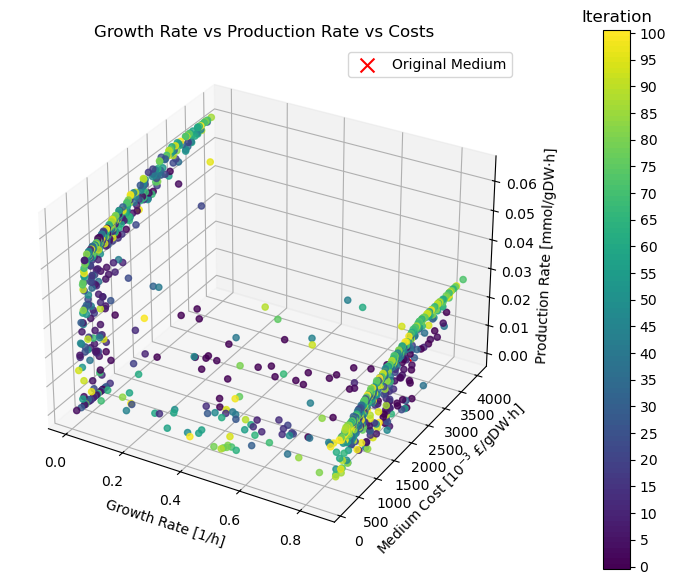

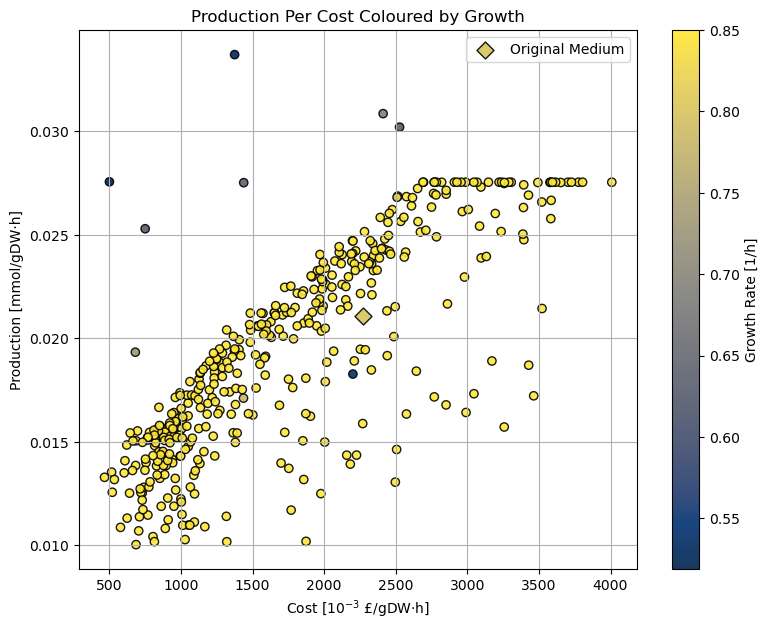

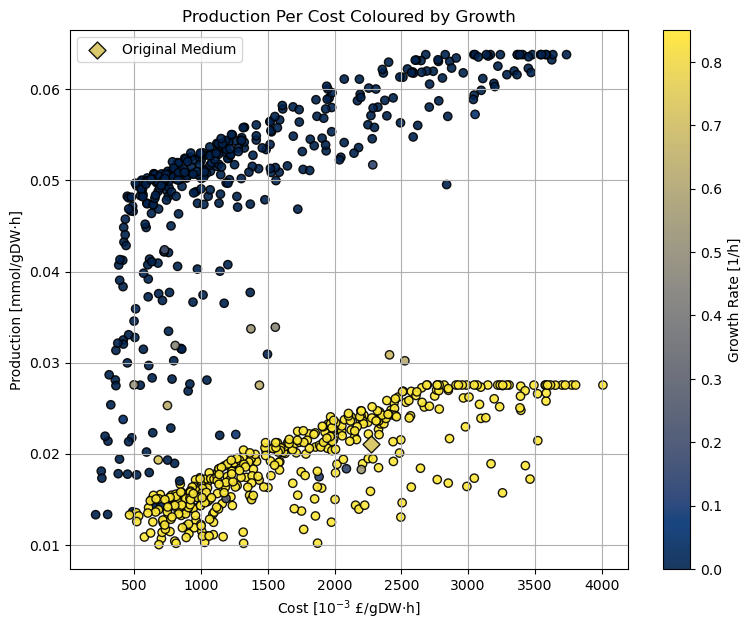

In [14]:
#load and deserialise the results
basename = "2024-11-19_BayesOpt_iJO1366_antiEpEX_scFv_growth-production-cost_qNEHVI_100it_round_4"
results = JSON_deserialize_load_results((basename + ".json"), model_iJO1366_antiEpEX_scFv)

medium = medium_iJO1366_enriched
bounds = bounds_iJO1366_enriched
costs = costs_iJO1366_enriched

plot_3D(
        results,
        xax = "growth rate tensors", 
        yax = "cost tensors", 
        zax = "production tensors",
        figname = (basename + "_3D.png"),
        MetModel = model_iJO1366_antiEpEX_scFv, 
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
plot_production_per_cost_coloured_by_growth(
        results,
        figname = (basename + "_best_coloured-by-growth.png"),
        growth_threshold = 0.5,
        production_threshold = 0.01,
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )
    # plot subset of results where production > 0.01 and growth doesn't matter
plot_production_per_cost_coloured_by_growth(
        results,
        figname = (basename + "_best-production_coloured-by-growth.png"),
        growth_threshold = 0.0,
        production_threshold = 0.01,
        MetModel = model_iJO1366_antiEpEX_scFv,
        initial_medium = medium,
        initial_costs = costs,
        model_objective = combined_objective
        )